# Data Exploration and Feature Engineering

This notebook covers the initial phase of the project: Data Understanding, Exploratory Data Analysis (EDA), and Feature Engineering. 
The goal is to transform the raw claim-level and beneficiary-level data into a provider-level dataset suitable for fraud detection modeling.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load train Data

In [4]:
# Define file paths
data_dir = '../data'

train_path = os.path.join(data_dir, 'Train-1542865627584.csv')
train_beneficiary_path = os.path.join(data_dir, 'Train_Beneficiarydata-1542865627584.csv')
train_inpatient_path = os.path.join(data_dir, 'Train_Inpatientdata-1542865627584.csv')
train_outpatient_path = os.path.join(data_dir, 'Train_Outpatientdata-1542865627584.csv')

# Load datasets
train_labels = pd.read_csv(train_path)
train_beneficiary = pd.read_csv(train_beneficiary_path)
train_inpatient = pd.read_csv(train_inpatient_path)
train_outpatient = pd.read_csv(train_outpatient_path)

print("Datasets loaded successfully.")

Datasets loaded successfully.


## 2. Data Understanding & Inspection

In [5]:
def inspect_dataframe(df, name):
    print(f"--- {name} ---")
    print(f"Shape: {df.shape}")
    print("\nFirst 3 rows:")
    display(df.head(3))
    print("\nInfo:")
    df.info()
    print("\nMissing Values:")
    print(df.isnull().sum()[df.isnull().sum() > 0])
    print("\n" + "="*50 + "\n")

In [6]:
inspect_dataframe(train_labels, "Train Labels")

# Calculate Missing Values

print("\nMissing values in Labels Data:")
print(train_labels.isnull().sum())


--- Train Labels ---
Shape: (5410, 2)

First 3 rows:


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB

Missing Values:
Series([], dtype: int64)



Missing values in Labels Data:
Provider          0
PotentialFraud    0
dtype: int64


In [7]:
inspect_dataframe(train_beneficiary, "Beneficiary Data")


print("\nMissing values in Beneficiary Data:")
print(train_beneficiary.isnull().sum())

--- Beneficiary Data ---
Shape: (138556, 25)

First 3 rows:


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCo

In [8]:
inspect_dataframe(train_inpatient, "Inpatient Data")

print("Missing values in Inpatient Data:")
print(train_inpatient.isnull().sum())


--- Inpatient Data ---
Shape: (40474, 30)

First 3 rows:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 n

In [9]:
inspect_dataframe(train_outpatient, "Outpatient Data")

print("\nMissing values in Outpatient Data:")
print(train_outpatient.isnull().sum())

--- Outpatient Data ---
Shape: (517737, 27)

First 3 rows:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisC

In [10]:
# Check unique identifiers
print(f"Unique Providers in Labels: {train_labels['Provider'].nunique()}")
print(f"Unique Beneficiaries: {train_beneficiary['BeneID'].nunique()}")
print(f"Unique Inpatient Claims: {train_inpatient['ClaimID'].nunique()}")
print(f"Unique Outpatient Claims: {train_outpatient['ClaimID'].nunique()}")

Unique Providers in Labels: 5410
Unique Beneficiaries: 138556
Unique Inpatient Claims: 40474
Unique Outpatient Claims: 517737


## 2.1 Data Quality Assessment
Identify and handle missing values and inconsistencies.

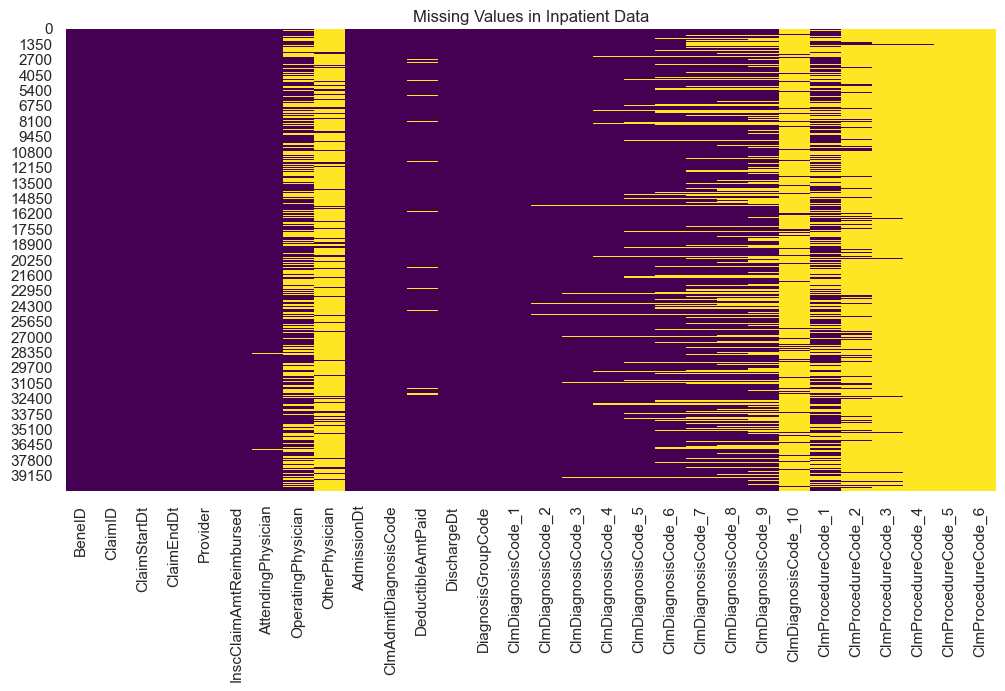

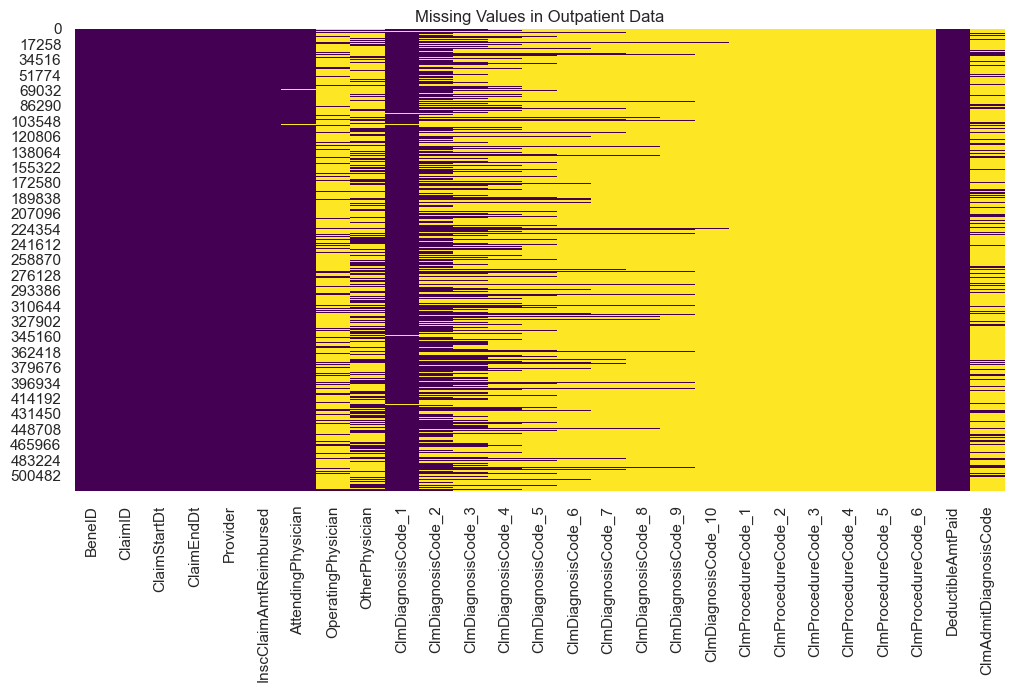

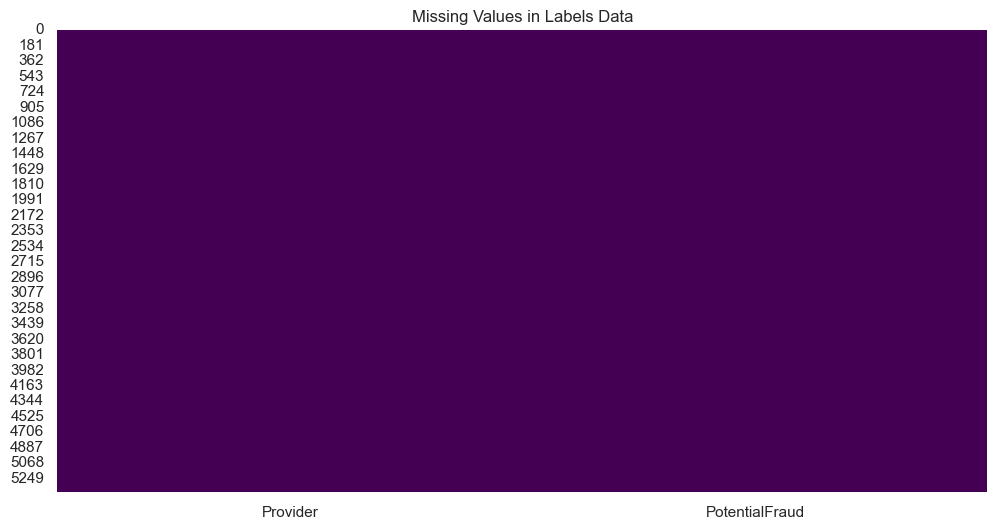

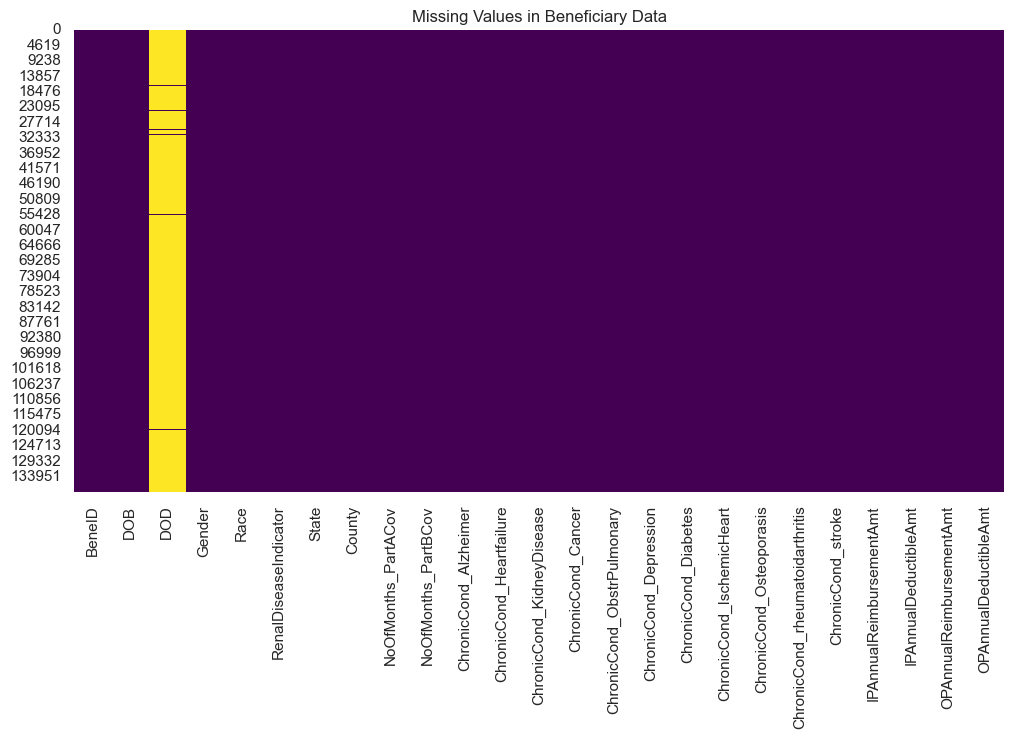

In [11]:
# Visualize Missing Values
plt.figure(figsize=(12, 6))
sns.heatmap(train_inpatient.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Inpatient Data')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(train_outpatient.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Outpatient Data')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(train_labels.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Labels Data')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(train_beneficiary.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Beneficiary Data')
plt.show()






**Missing values handling for training data**

In [12]:
#handleing missing values for Beneficiary data
#DOD will be DOB plus age
train_beneficiary['isDead'] = train_beneficiary['DOD'].notnull()
train_beneficiary.drop('DOD', axis=1, inplace=True)


In [13]:

#handling missing values for inpatiand data with over 80% missing data
train_inpatient.drop(['OtherPhysician', 'ClmProcedureCode_6', 'ClmProcedureCode_5', 'ClmProcedureCode_4',
 'ClmProcedureCode_3', 'ClmProcedureCode_2', 'ClmProcedureCode_1', 'ClmDiagnosisCode_10', 'ClmDiagnosisCode_9','ClmDiagnosisCode_8','ClmDiagnosisCode_7','ClmDiagnosisCode_6',
 'ClmDiagnosisCode_5','ClmDiagnosisCode_4','OperatingPhysician', 'OtherPhysician'], axis=1, inplace=True)

In [14]:



#handling missing values for outpatient data
train_outpatient.drop(['ClmProcedureCode_6', 'ClmProcedureCode_5', 'ClmProcedureCode_4', 'ClmProcedureCode_3',
                 'ClmProcedureCode_2', 'ClmProcedureCode_1', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_8',
                 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_4',
                 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_1', 'OtherPhysician',
                 'OperatingPhysician', 'ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_10'], axis=1, inplace=True)





In [15]:
#drop dates?
train_inpatient.drop(columns=['ClaimStartDt', 'ClaimEndDt'], inplace=True)
train_outpatient.drop(columns=['ClaimStartDt', 'ClaimEndDt'], inplace=True)

train_beneficiary.drop(columns=['DOB'], inplace=True)

In [16]:
#handle renal Y and 0 to make 1 and 0

train_beneficiary['RenalDiseaseIndicator'] = train_beneficiary['RenalDiseaseIndicator'].replace('Y', 1)


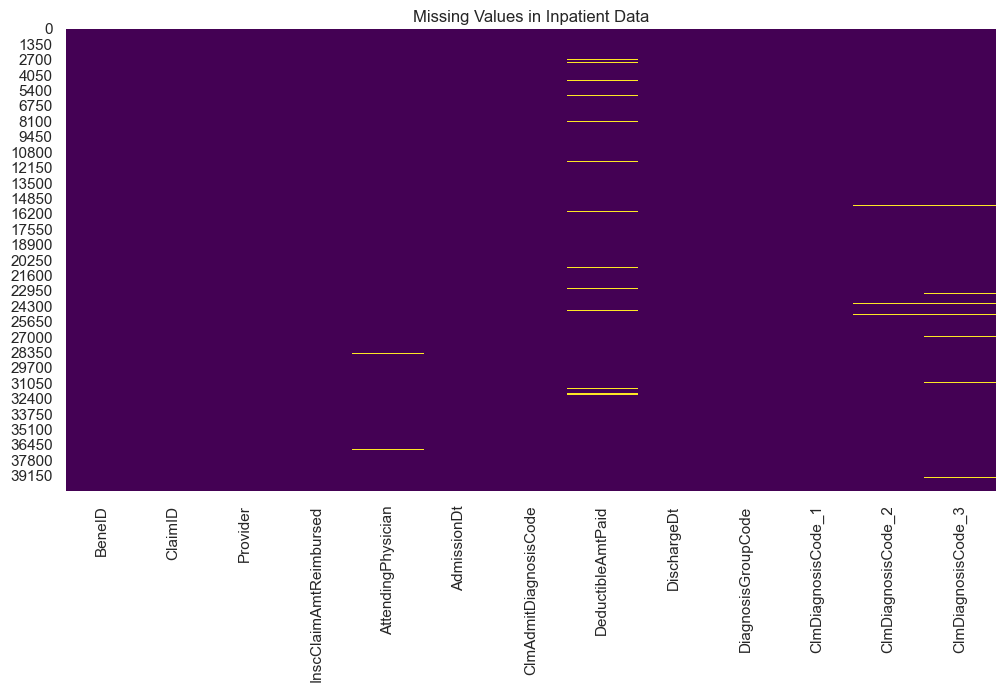

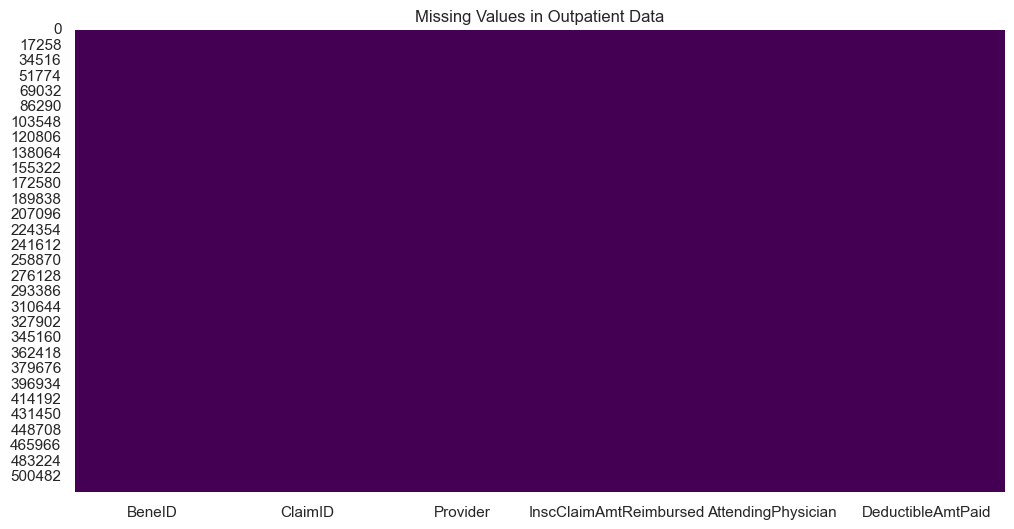

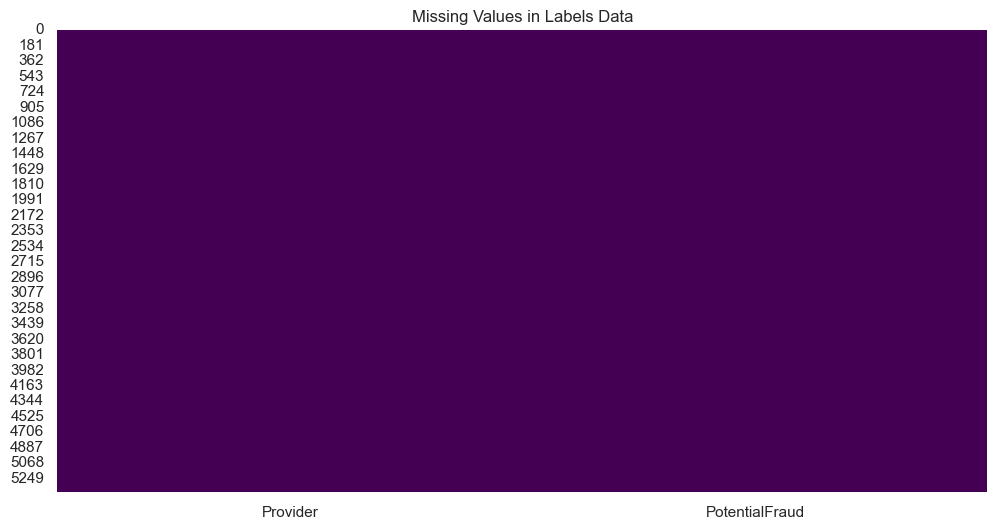

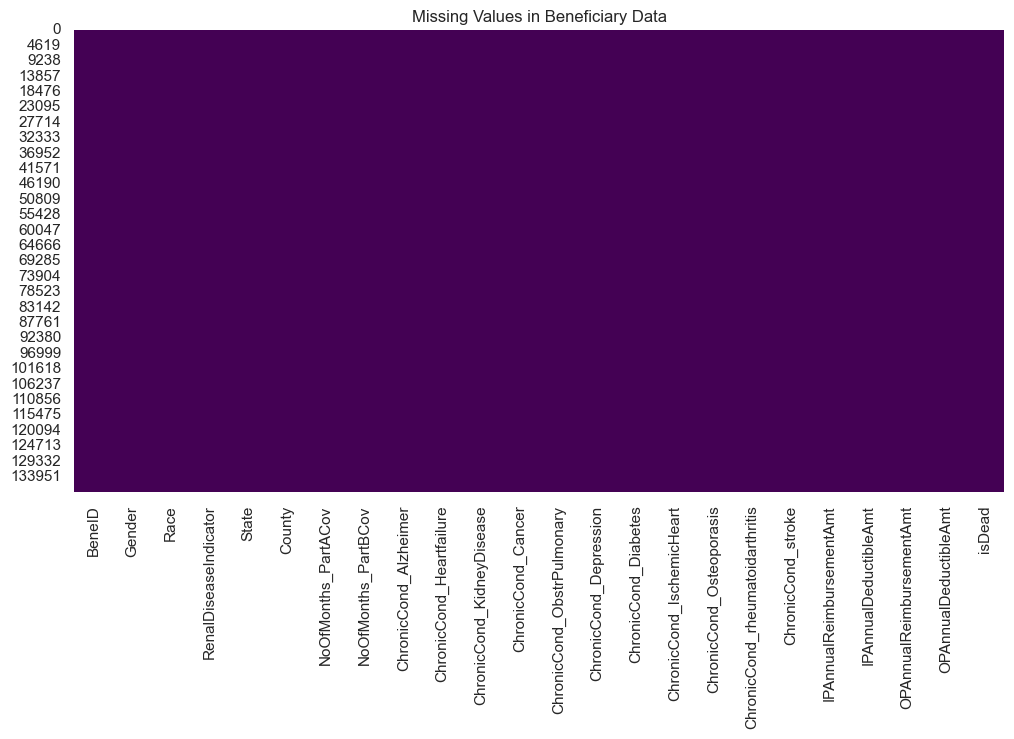

In [17]:
# Visualize Missing Values
plt.figure(figsize=(12, 6))
sns.heatmap(train_inpatient.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Inpatient Data')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(train_outpatient.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Outpatient Data')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(train_labels.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Labels Data')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(train_beneficiary.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Beneficiary Data')
plt.show()

## 3. Exploratory Data Analysis (EDA)

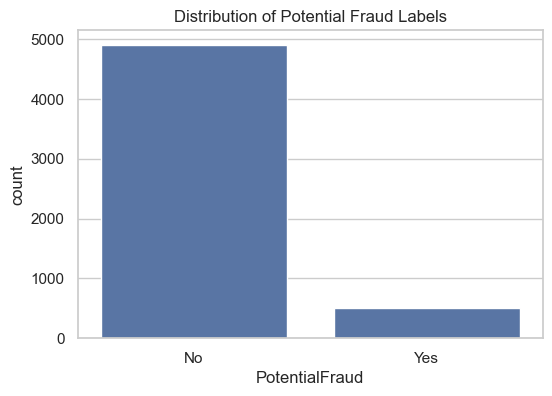

PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64
Fraud Percentage: 9.35%


In [18]:
# Target Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='PotentialFraud', data=train_labels)
plt.title('Distribution of Potential Fraud Labels')
plt.show()

fraud_counts = train_labels['PotentialFraud'].value_counts()
print(fraud_counts)
print(f"Fraud Percentage: {fraud_counts['Yes'] / len(train_labels) * 100:.2f}%")

### Enhanced EDA: Beneficiaries, Claims, and Providers

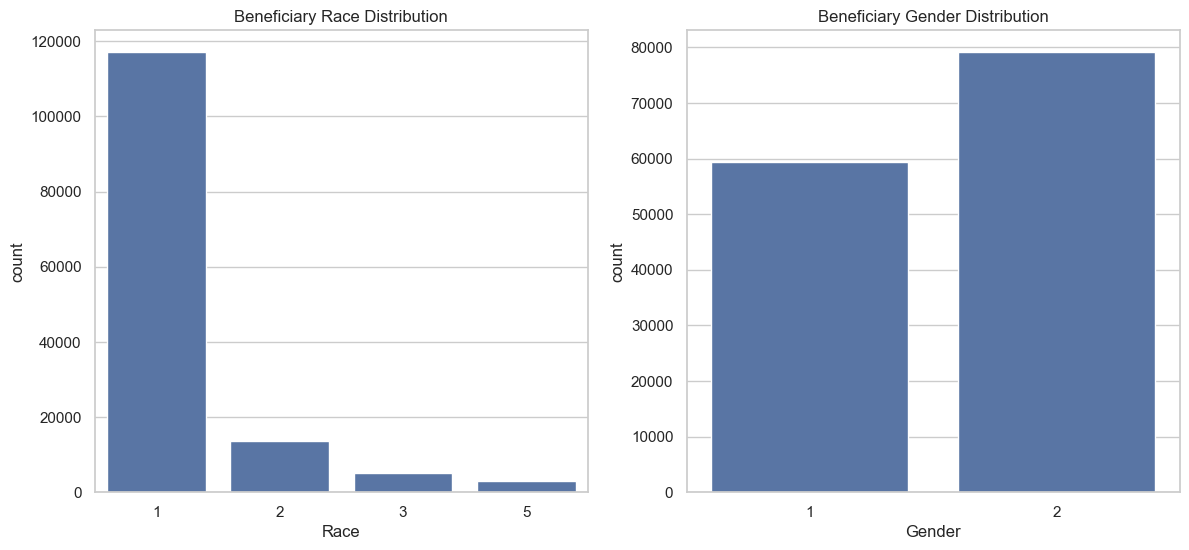

In [19]:
# Beneficiary Analysis


# Race and Gender
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x='Race', data=train_beneficiary, ax=axes[0])
axes[0].set_title('Beneficiary Race Distribution')
sns.countplot(x='Gender', data=train_beneficiary, ax=axes[1])
axes[1].set_title('Beneficiary Gender Distribution')
plt.show()

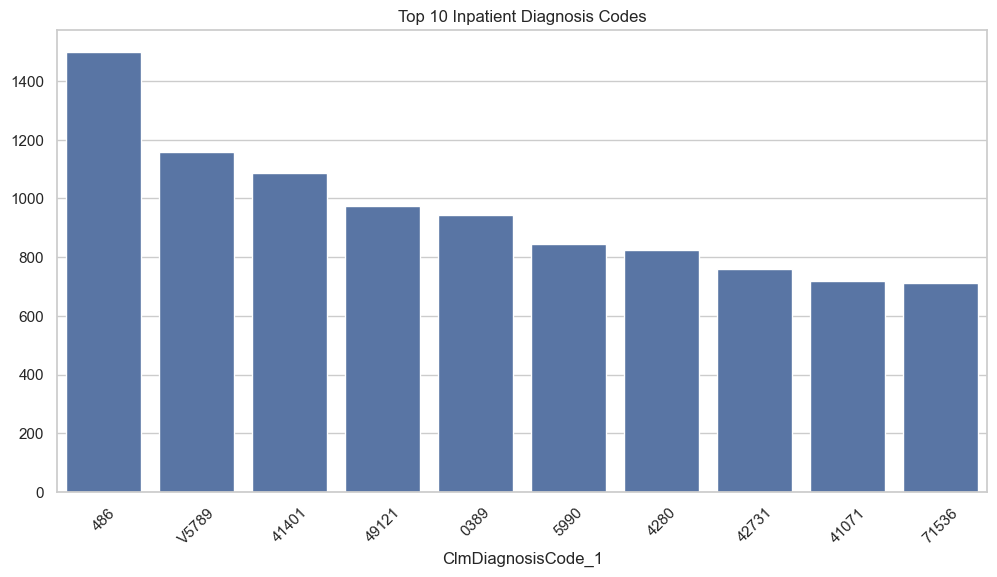

In [20]:
# Claims Analysis: Top Diagnosis Codes
top_diag = train_inpatient['ClmDiagnosisCode_1'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_diag.index, y=top_diag.values)
plt.title('Top 10 Inpatient Diagnosis Codes')
plt.xticks(rotation=45)
plt.show()

### Merging train Data for Analysis
To analyze provider behavior, we need to link claims to providers and their fraud labels.

In [21]:
# Add a flag to distinguish inpatient vs outpatient before merging
train_inpatient['ClaimType'] = 'Inpatient'
train_outpatient['ClaimType'] = 'Outpatient'

# Combine Inpatient and Outpatient claims
all_claims = pd.concat([train_inpatient, train_outpatient], axis=0, sort=False)

# Merge with Labels
claims_with_labels = pd.merge(all_claims, train_labels, on='Provider', how='left')

# Merge with Beneficiary Data
full_data = pd.merge(claims_with_labels, train_beneficiary, on='BeneID', how='left')

print(f"Full Combined Data Shape: {full_data.shape}")

Full Combined Data Shape: (558211, 38)


In [22]:
full_data.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,isDead
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,2009-04-12,7866,1068.0,2009-04-18,201,...,1,1,2,1,1,36000,3204,60,70,False
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,2009-08-31,6186,1068.0,2009-09-02,750,...,1,1,2,1,1,36000,3204,60,70,False
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,2009-09-17,29590,1068.0,2009-09-20,883,...,1,1,2,1,1,36000,3204,60,70,False
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,2009-02-14,431,1068.0,2009-02-22,067,...,1,2,2,1,1,5000,1068,250,320,False
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,2009-08-13,78321,1068.0,2009-08-30,975,...,2,1,2,2,2,21260,2136,120,100,False


In [23]:
full_data.drop(['ClaimID', 'BeneID'], axis=1, inplace=True)

### Financial Analysis

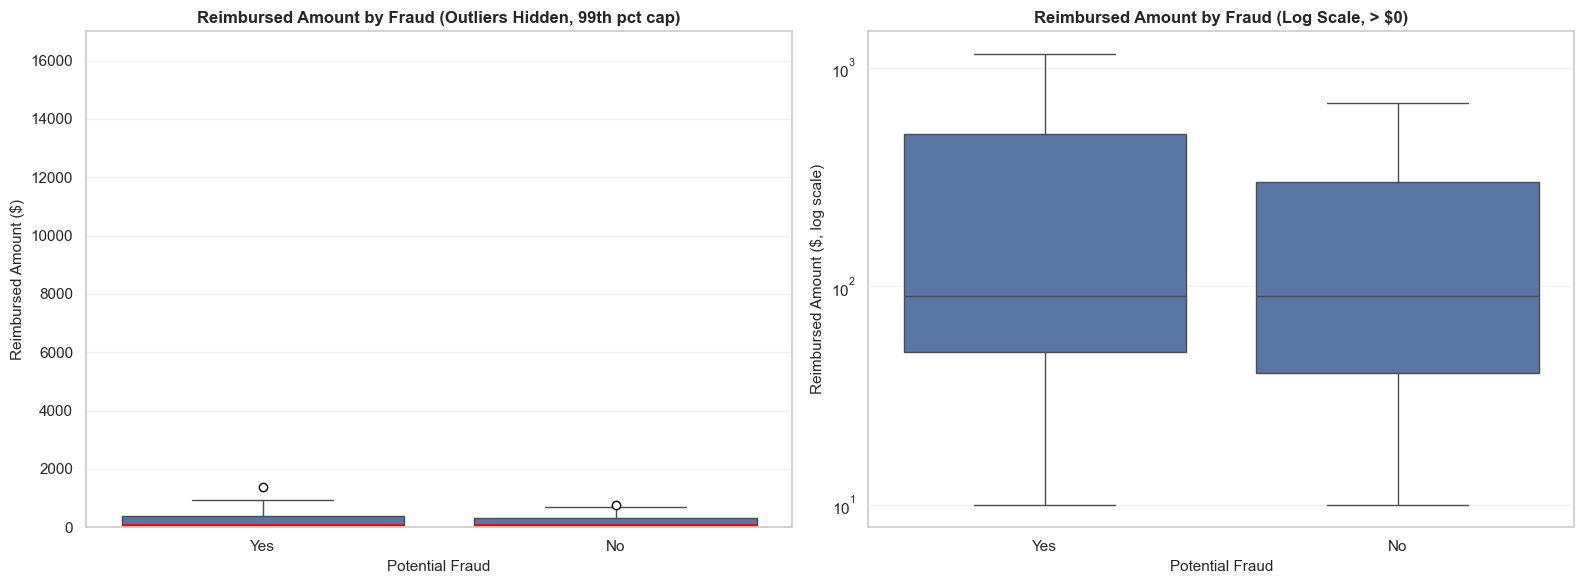

99th percentile cap: $17,000
Hidden points above cap by class:
PotentialFraud
No     2069
Yes    3092
Name: hidden, dtype: int64

Average Reimbursement Amount:
PotentialFraud
No      755.21
Yes    1389.51
Name: InscClaimAmtReimbursed, dtype: float64

Median Reimbursement Amount:
PotentialFraud
No     80.0
Yes    90.0
Name: InscClaimAmtReimbursed, dtype: float64


In [35]:
# Compare Claim Amounts: Fraud vs Non-Fraud — clearer dual view
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Trim extreme values (99th percentile cap) and hide outliers
cap = full_data['InscClaimAmtReimbursed'].quantile(0.99)
sns.boxplot(
    x='PotentialFraud',
    y='InscClaimAmtReimbursed',
    data=full_data,
    ax=axes[0],
    showfliers=False,
    showmeans=True,
    meanprops=dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=6),
    medianprops=dict(color='red', linewidth=2)
)
axes[0].set_title('Reimbursed Amount by Fraud (Outliers Hidden, 99th pct cap)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Reimbursed Amount ($)', fontsize=11)
axes[0].set_xlabel('Potential Fraud', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim(0, cap)

# Right: Full-range view on log scale (only positive amounts)
pos = full_data[full_data['InscClaimAmtReimbursed'] > 0]
sns.boxplot(
    x='PotentialFraud',
    y='InscClaimAmtReimbursed',
    data=pos,
    ax=axes[1],
    showfliers=False
)
axes[1].set_yscale('log')
axes[1].set_title('Reimbursed Amount by Fraud (Log Scale, > $0)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Reimbursed Amount ($, log scale)', fontsize=11)
axes[1].set_xlabel('Potential Fraud', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Stats + annotation about hidden points
hidden_counts = (
    full_data.assign(hidden=full_data['InscClaimAmtReimbursed'] > cap)
    .groupby('PotentialFraud')['hidden']
    .sum()
)
print(f"99th percentile cap: ${cap:,.0f}")
print('Hidden points above cap by class:')
print(hidden_counts)

print('\nAverage Reimbursement Amount:')
print(full_data.groupby('PotentialFraud')['InscClaimAmtReimbursed'].mean().round(2))
print('\nMedian Reimbursement Amount:')
print(full_data.groupby('PotentialFraud')['InscClaimAmtReimbursed'].median().round(2))

### Outlier Analysis

Number of Outliers in Reimbursement Amount: 94652
Percentage of Outliers: 16.96%

Outliers by Fraud Status:
PotentialFraud
No     51628
Yes    43024
Name: count, dtype: int64

Percentage of Fraud in Outliers: 45.45%


/var/folders/wv/pv_14czn0g3f1ps_cd7vr_1w0000gn/T/ipykernel_61035/1912734361.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0].boxplot([no_fraud_data, fraud_data], labels=['No', 'Yes'], patch_artist=True)


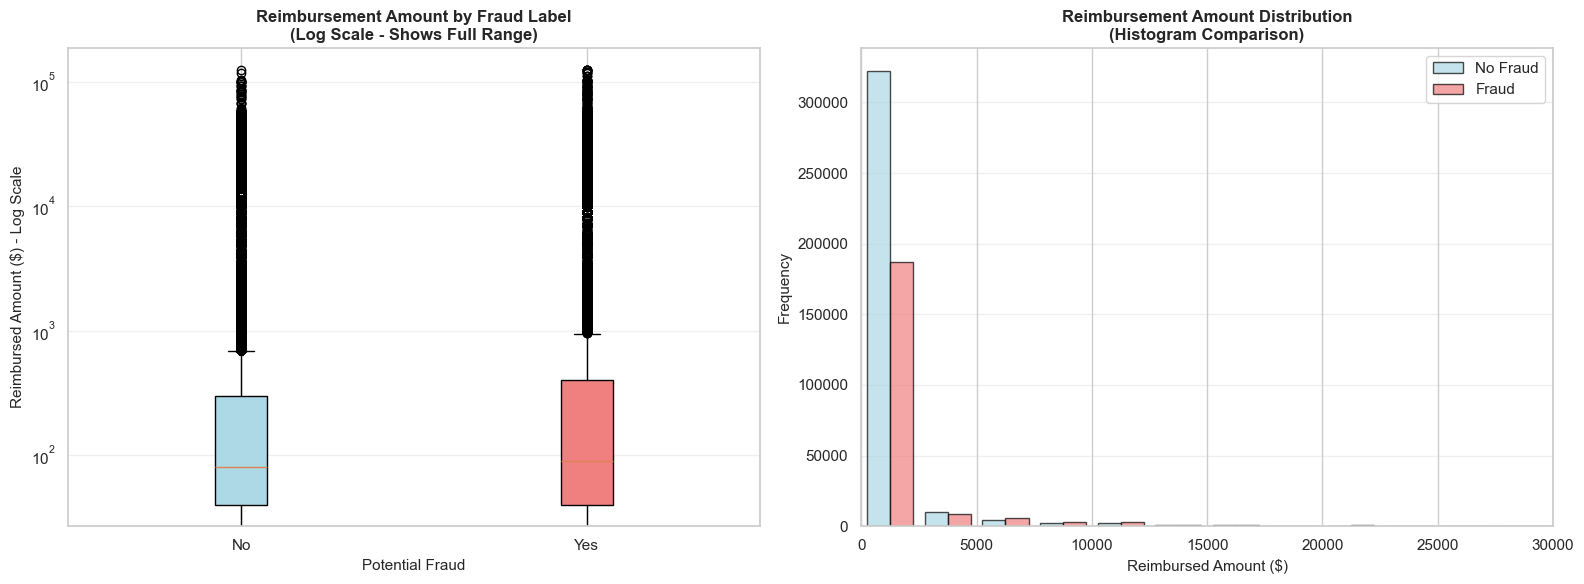

In [25]:
# Outlier Detection using IQR for Reimbursement Amount
Q1 = full_data['InscClaimAmtReimbursed'].quantile(0.25)
Q3 = full_data['InscClaimAmtReimbursed'].quantile(0.75)
IQR = Q3 - Q1

outliers = full_data[(full_data['InscClaimAmtReimbursed'] < (Q1 - 1.5 * IQR)) | 
                     (full_data['InscClaimAmtReimbursed'] > (Q3 + 1.5 * IQR))]

print(f"Number of Outliers in Reimbursement Amount: {len(outliers)}")
print(f"Percentage of Outliers: {len(outliers)/len(full_data)*100:.2f}%")

# Outlier distribution by fraud status
outlier_fraud_dist = outliers['PotentialFraud'].value_counts()
print(f"\nOutliers by Fraud Status:")
print(outlier_fraud_dist)
print(f"\nPercentage of Fraud in Outliers: {outlier_fraud_dist.get('Yes', 0)/len(outliers)*100:.2f}%")

# Create a clearer visualization with statistics overlay
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Box plot with log scale for better visualization
fraud_data = full_data[full_data['PotentialFraud'] == 'Yes']['InscClaimAmtReimbursed']
no_fraud_data = full_data[full_data['PotentialFraud'] == 'No']['InscClaimAmtReimbursed']

bp = axes[0].boxplot([no_fraud_data, fraud_data], labels=['No', 'Yes'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightcoral')
axes[0].set_yscale('log')
axes[0].set_title('Reimbursement Amount by Fraud Label\n(Log Scale - Shows Full Range)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Reimbursed Amount ($) - Log Scale', fontsize=11)
axes[0].set_xlabel('Potential Fraud', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Right: Histogram comparison
axes[1].hist([no_fraud_data, fraud_data], bins=50, label=['No Fraud', 'Fraud'], 
             alpha=0.7, color=['lightblue', 'lightcoral'], edgecolor='black')
axes[1].set_xlim(0, 30000)
axes[1].set_title('Reimbursement Amount Distribution\n(Histogram Comparison)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Reimbursed Amount ($)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Geographic and Temporal Analysis

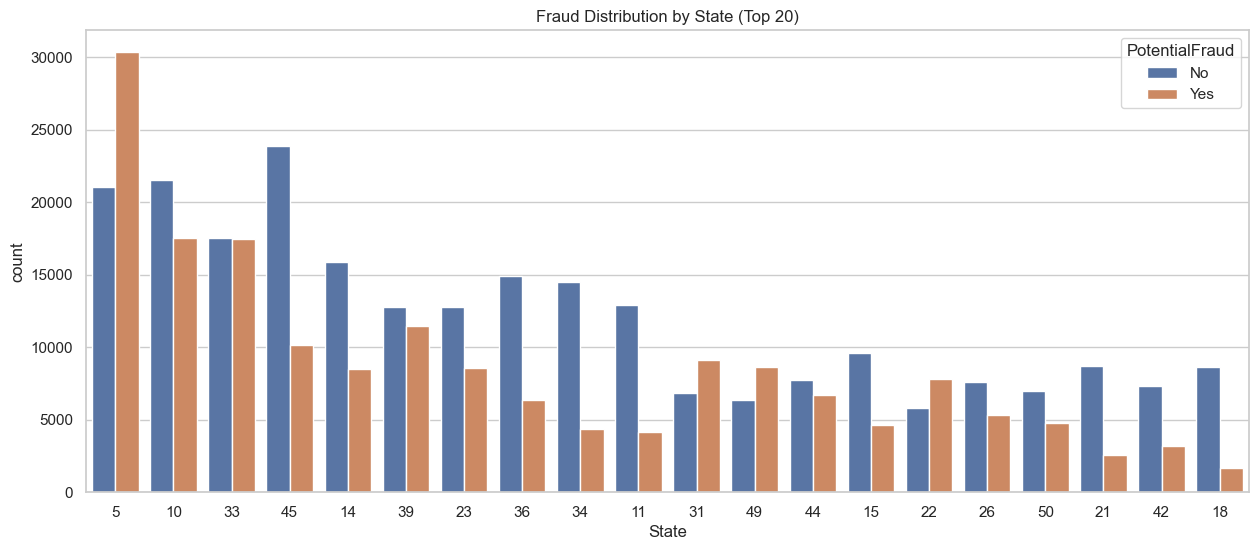

In [26]:
# Convert dates to datetime
#full_data['ClaimStartDt'] = pd.to_datetime(full_data['ClaimStartDt'])
#full_data['ClaimEndDt'] = pd.to_datetime(full_data['ClaimEndDt'])

# Calculate Claim Duration
#full_data['ClaimDuration'] = (full_data['ClaimEndDt'] - full_data['ClaimStartDt']).dt.days

# Plot Claim Duration
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='PotentialFraud', y='ClaimDuration', data=full_data)
# plt.title('Claim Duration Distribution by Fraud Label')
# plt.show()

# print("Average Claim Duration:")
# print(full_data.groupby('PotentialFraud')['ClaimDuration'].mean())

# Plot State Distribution (Top 20 states)
plt.figure(figsize=(15, 6))
sns.countplot(x='State', hue='PotentialFraud', data=full_data, order=full_data['State'].value_counts().iloc[:20].index)
plt.title('Fraud Distribution by State (Top 20)')
plt.legend(title='PotentialFraud')
plt.show()

## 4. Feature Engineering: Provider-Level Aggregation
We need to aggregate claim-level and beneficiary-level information up to the provider level.

In [27]:
print(train_beneficiary.head())

      BeneID  Gender  Race RenalDiseaseIndicator  State  County  \
0  BENE11001       1     1                     0     39     230   
1  BENE11002       2     1                     0     39     280   
2  BENE11003       1     1                     0     52     590   
3  BENE11004       1     1                     0     39     270   
4  BENE11005       1     1                     0     24     680   

   NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0                   12                   12                      1   
1                   12                   12                      2   
2                   12                   12                      1   
3                   12                   12                      1   
4                   12                   12                      2   

   ChronicCond_Heartfailure  ...  ChronicCond_Diabetes  \
0                         2  ...                     1   
1                         2  ...                     2   
2 

In [28]:
def aggregate_provider_data(claims_df, beneficiary_df, labels_df=None):
    # Merge claims with beneficiary data first to get patient details on each claim
    claims_merged = pd.merge(claims_df, beneficiary_df, on='BeneID', how='left')
    
    # Define aggregation dictionary
    agg_funcs = {
        'ClaimID': 'count', # Total Claims
        'BeneID': 'nunique', # Unique Patients
        'AttendingPhysician': 'nunique', # Unique Doctors
        'InscClaimAmtReimbursed': ['sum', 'mean', 'std'], # Financials
        'DeductibleAmtPaid': ['sum', 'mean'],
        'NoOfMonths_PartACov': 'mean', # Patient characteristics
        'NoOfMonths_PartBCov': 'mean',
        'IPAnnualReimbursementAmt': 'mean',
        'OPAnnualReimbursementAmt': 'mean',
        'ChronicCond_Alzheimer': lambda x: (x==1).mean(), # Chronic Condition Prevalence (Percentage of No)
        'ChronicCond_Heartfailure': lambda x: (x==1).mean(),
        'ChronicCond_KidneyDisease': lambda x: (x==1).mean(),
        'ChronicCond_Cancer': lambda x: (x==1).mean(),
        'ChronicCond_ObstrPulmonary': lambda x: (x==1).mean(),
        'ChronicCond_Depression': lambda x: (x==1).mean(),
        'ChronicCond_Diabetes': lambda x: (x==1).mean(),
        'ChronicCond_IschemicHeart': lambda x: (x==1).mean(),
        'ChronicCond_Osteoporasis': lambda x: (x==1).mean(),
        'ChronicCond_rheumatoidarthritis': lambda x: (x==1).mean(),
        'ChronicCond_stroke': lambda x: (x==1).mean(),
        'RenalDiseaseIndicator': lambda x: (x==1).mean(),
    }
    
    # Perform aggregation by Provider
    provider_agg = claims_merged.groupby('Provider').agg(agg_funcs)
    
    # Flatten MultiIndex columns
    provider_agg.columns = ['_'.join(col).strip() for col in provider_agg.columns.values]
    provider_agg.reset_index(inplace=True)
    
    # Rename specific columns for clarity
    provider_agg.rename(columns={
        'ClaimID_count': 'TotalClaims',
        'BeneID_nunique': 'UniqueBeneficiaries',
        'AttendingPhysician_nunique': 'UniquePhysicians'
    }, inplace=True)
    
    # Add Labels if provided
    if labels_df is not None:
        final_df = pd.merge(provider_agg, labels_df, on='Provider', how='left')
    else:
        final_df = provider_agg
    
    return final_df

# Note: Chronic conditions are coded 1=Yes, 2=No. 
# To make 'mean' meaningful (percentage of Yes), we should convert 2 to 0.
# Let's do a quick preprocessing on beneficiary data for chronic conditions.
chronic_cols = [col for col in train_beneficiary.columns if 'ChronicCond' in col]
train_beneficiary_processed = train_beneficiary.copy()
for col in chronic_cols:
    train_beneficiary_processed[col] = train_beneficiary_processed[col].replace(2, 0)

# RenalDiseaseIndicator is '0'/'Y'. Convert to 0/1.
train_beneficiary_processed['RenalDiseaseIndicator'] = train_beneficiary_processed['RenalDiseaseIndicator'].replace('Y', 1).astype(int)

# Aggregate
provider_features = aggregate_provider_data(all_claims, train_beneficiary_processed, train_labels)

print("Provider Level Features Shape:", provider_features.shape)
display(provider_features.head())

Provider Level Features Shape: (5410, 26)


,Provider,TotalClaims,UniqueBeneficiaries,UniquePhysicians,InscClaimAmtReimbursed_sum,InscClaimAmtReimbursed_mean,InscClaimAmtReimbursed_std,DeductibleAmtPaid_sum,DeductibleAmtPaid_mean,NoOfMonths_PartACov_mean,...,ChronicCond_Cancer_<lambda>,ChronicCond_ObstrPulmonary_<lambda>,ChronicCond_Depression_<lambda>,ChronicCond_Diabetes_<lambda>,ChronicCond_IschemicHeart_<lambda>,ChronicCond_Osteoporasis_<lambda>,ChronicCond_rheumatoidarthritis_<lambda>,ChronicCond_stroke_<lambda>,RenalDiseaseIndicator_<lambda>,PotentialFraud
0,PRV51001,25,24,14,104640,4185.600000,10796.091144,5340.0,213.600000,12.000000,...,0.200000,0.400000,0.360000,0.840000,0.920000,0.240000,0.320000,0.240000,0.320000,No
1,PRV51003,132,117,44,605670,4588.409091,7309.794729,66286.0,502.166667,11.818182,...,0.075758,0.310606,0.409091,0.757576,0.848485,0.250000,0.287879,0.090909,0.219697,Yes
2,PRV51004,149,138,38,52170,350.134228,689.963754,310.0,2.080537,11.865772,...,0.107383,0.275168,0.422819,0.704698,0.724832,0.328859,0.308725,0.114094,0.154362,No
3,PRV51005,1165,495,6,280910,241.124464,491.556392,3700.0,3.175966,11.907296,...,0.141631,0.253219,0.416309,0.685837,0.768240,0.295279,0.284120,0.106438,0.222318,Yes
4,PRV51007,72,58,10,33710,468.194444,1433.769116,3264.0,45.333333,11.833333,...,0.166667,0.222222,0.402778,0.680556,0.708333,0.291667,0.305556,0.166667,0.152778,No


## 5. Correlation Analysis

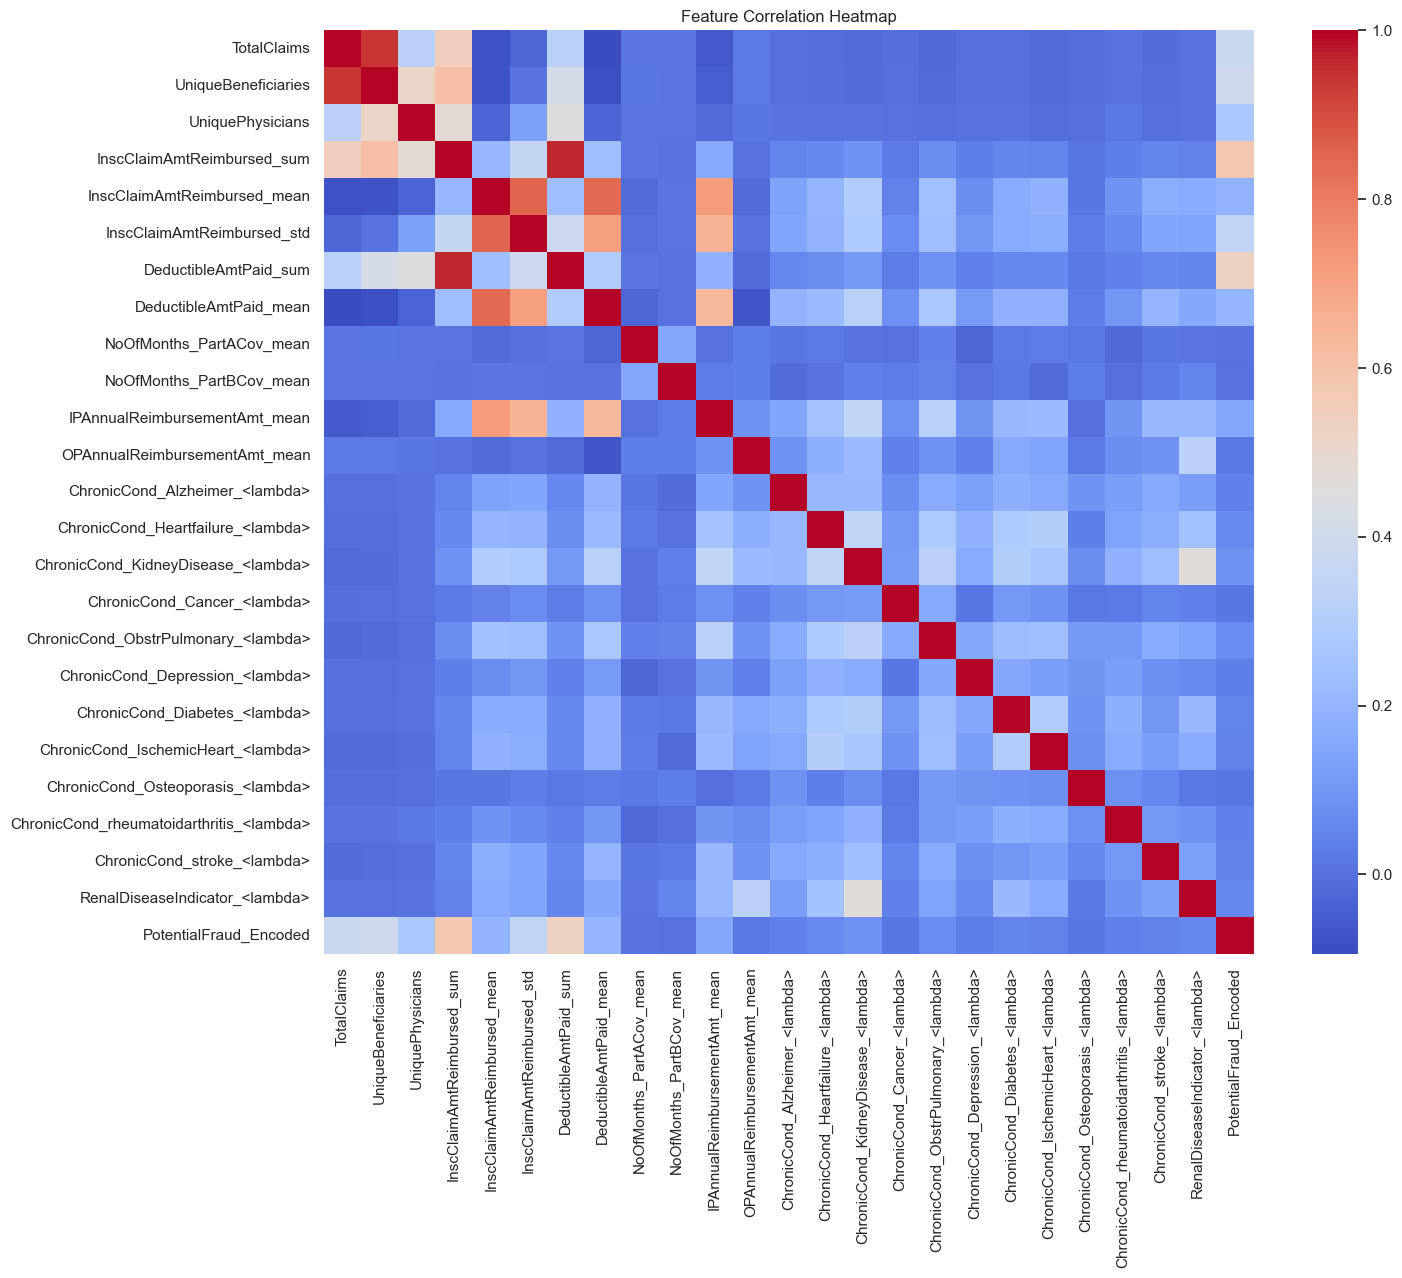

Top Features correlated with Fraud:
PotentialFraud_Encoded           1.000000
InscClaimAmtReimbursed_sum       0.575558
DeductibleAmtPaid_sum            0.532070
UniqueBeneficiaries              0.393531
TotalClaims                      0.374197
InscClaimAmtReimbursed_std       0.343145
UniquePhysicians                 0.276772
DeductibleAmtPaid_mean           0.204616
InscClaimAmtReimbursed_mean      0.193803
IPAnnualReimbursementAmt_mean    0.149421
Name: PotentialFraud_Encoded, dtype: float64


In [29]:
# Encode Target for Correlation
provider_features['PotentialFraud_Encoded'] = provider_features['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Correlation Heatmap
plt.figure(figsize=(15, 12))
# Select only numeric columns for correlation
numeric_features = provider_features.select_dtypes(include=[np.number])
sns.heatmap(numeric_features.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

# Top correlations with Fraud
corr_with_fraud = numeric_features.corr()['PotentialFraud_Encoded'].sort_values(ascending=False)
print("Top Features correlated with Fraud:")
print(corr_with_fraud.head(10))

## 6. Save Processed Train Data

In [30]:
output_path = os.path.join(data_dir, 'train_provider_features.csv')
provider_features.to_csv(output_path, index=False)
print(f"Saved provider-level features to {output_path}")

Saved provider-level features to ../data/train_provider_features.csv
